channel405:range of pline0:(0, 439)
channel405:range of pline1:(27, 305)
channel405:range of pline2:(39, 384)
[ 695 5310]


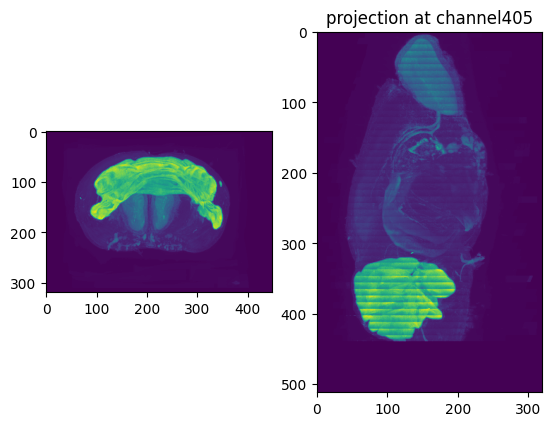

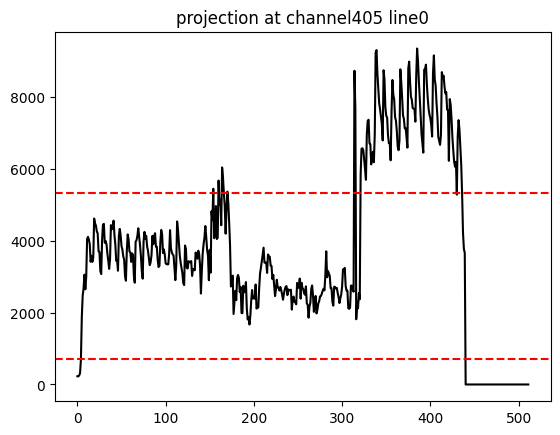

[1471 3835]


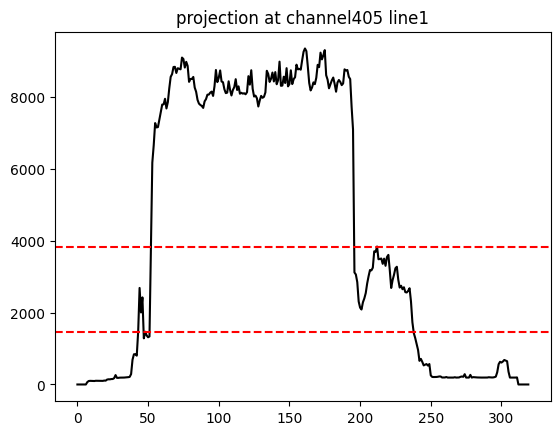

[ 752 4398]


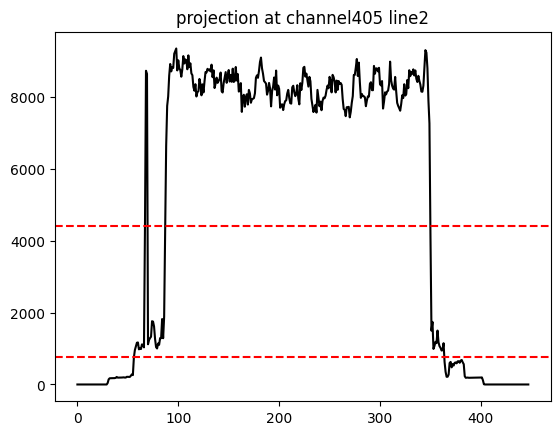

channel488:range of pline0:(0, 439)
channel488:range of pline1:(27, 305)
channel488:range of pline2:(56, 382)
[1732 6052]


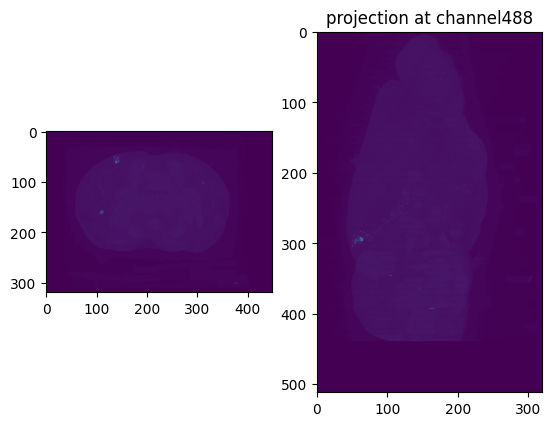

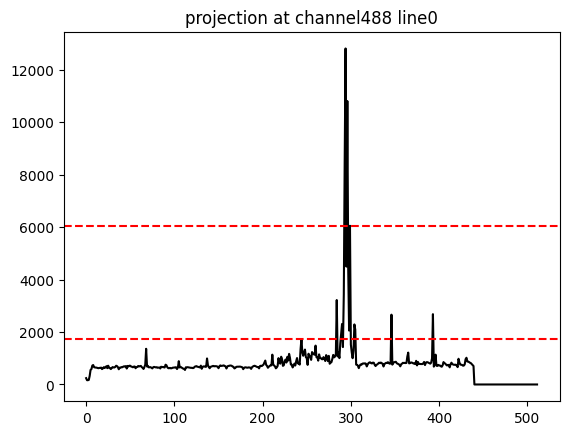

[1376 4422]


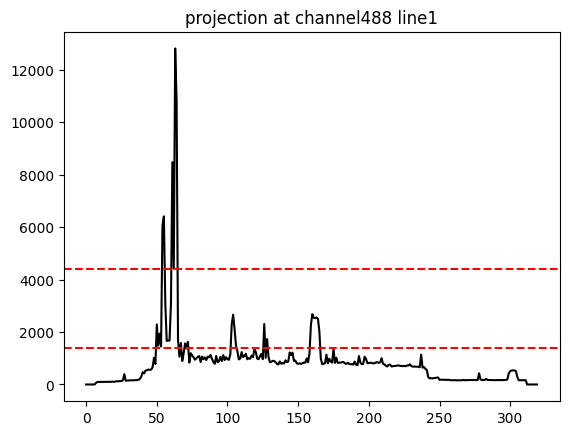

[ 477 3220]


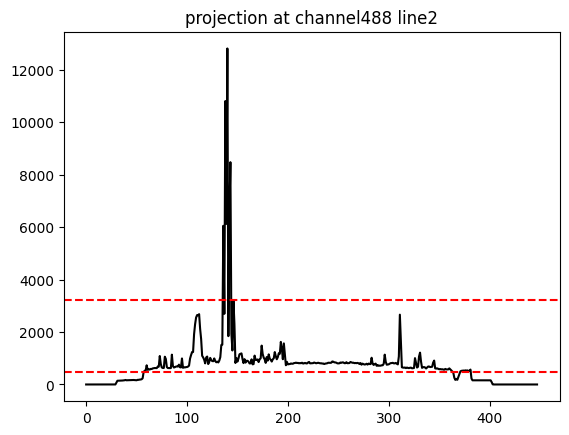

channel561:range of pline0:(4, 439)
channel561:range of pline1:(26, 304)
channel561:range of pline2:(56, 382)
[ 303 1596]


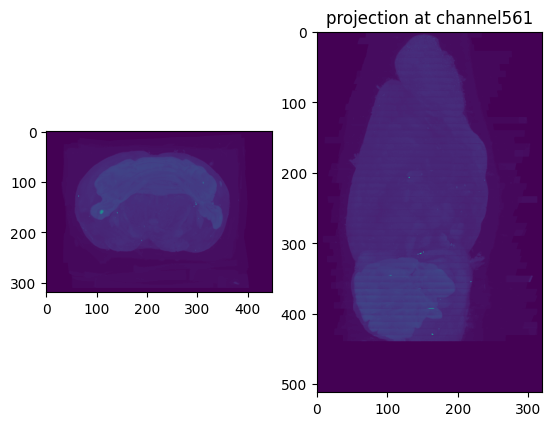

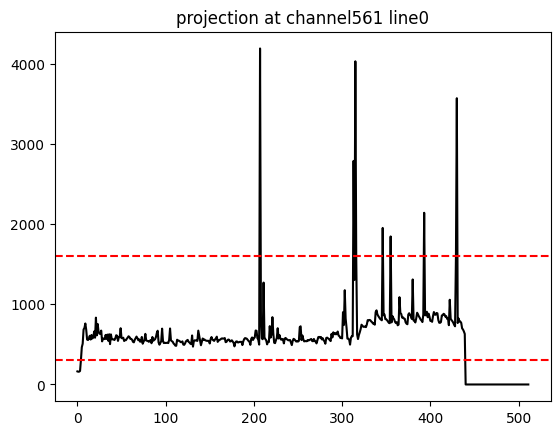

[ 499 1619]


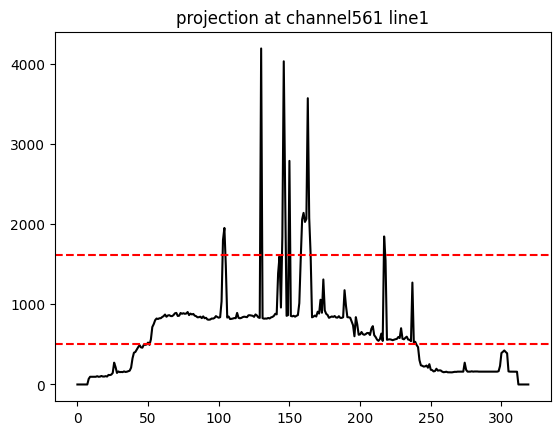

[ 484 1676]


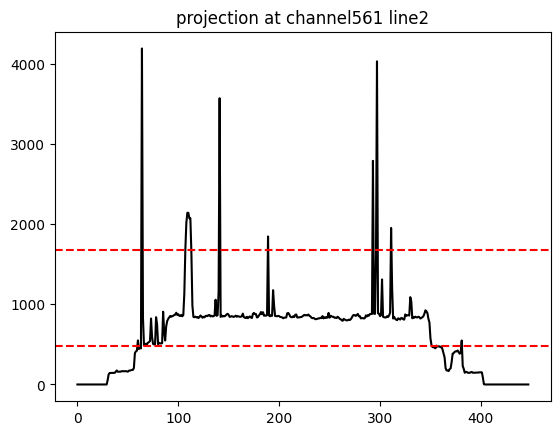

channel640:range of pline0:(4, 439)
channel640:range of pline1:(35, 304)
channel640:range of pline2:(56, 381)
[ 141 1091]


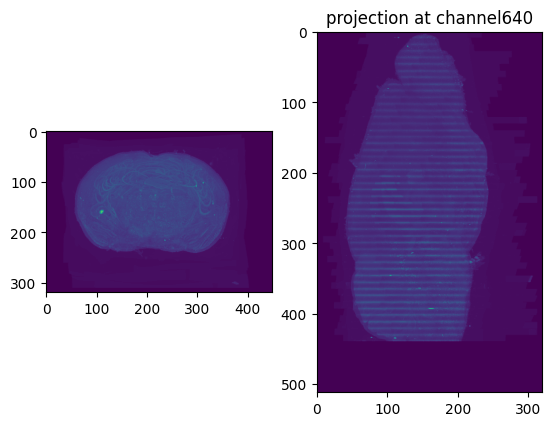

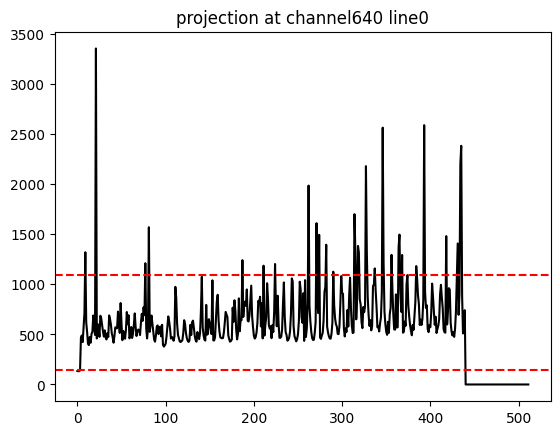

[ 575 1644]


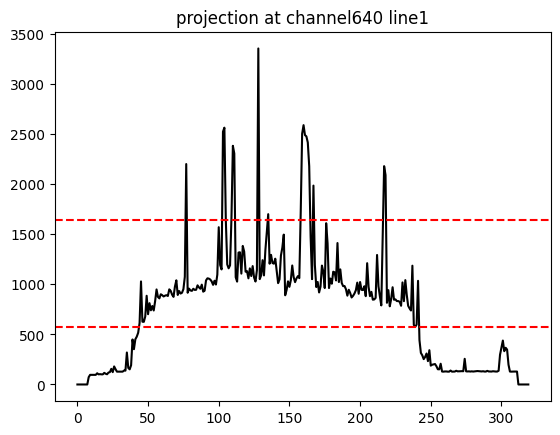

[ 507 1609]


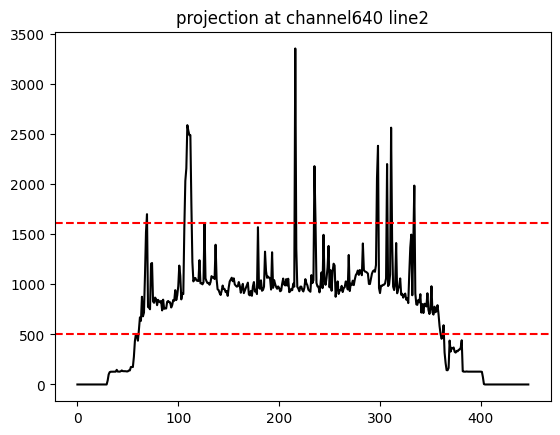

In [1]:
import numpy as np
import tifffile as tif
import matplotlib.pyplot as plt
from skimage.filters import threshold_multiotsu
dir="/Users/cottonfisher/workspace/cluster2boudnary/data/"
ch_list=['405','488','561','640']



def mip(vol,axis=0):
    return np.max(vol,axis=axis) 

def find_range(line,thres=200):
    return np.where(line>thres)[0][0],np.where(line>thres)[0][-1]

def scatter_plot(x, y,comment='scatter plot'):
    fig, ax = plt.subplots()  # Create figure and axis
    ax.plot(x, y, '-k')  # Plot the data on the axis
    thresholds = threshold_multiotsu(y,classes=3)
    print(thresholds)
    for thresh in thresholds:
        ax.axhline(thresh, color='r', linestyle='--')  # Add horizontal lines for the thresholds
    ax.set_title(comment)
    plt.show()




    


for ch in ch_list:
    vol=tif.imread(f"{dir}/r32_c{ch}.tif")
    projects0=mip(vol,axis=0)
    projects2=mip(vol,axis=2)
    pline0=mip(projects2,axis=1)
    pline1=mip(projects0,axis=1)
    pline2=mip(projects0,axis=0)
    print(f"channel{ch}:range of pline0:{find_range(pline0)}")
    print(f"channel{ch}:range of pline1:{find_range(pline1)}")
    print(f"channel{ch}:range of pline2:{find_range(pline2)}")
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(projects0)
    plt.subplot(1,2,2)
    plt.imshow(projects2)
    plt.title(f"projection at channel{ch}")
    scatter_plot(range(len(pline0)),pline0,comment=f"projection at channel{ch} line0")
    scatter_plot(range(len(pline1)),pline1,comment=f"projection at channel{ch} line1")
    scatter_plot(range(len(pline2)),pline2,comment=f"projection at channel{ch} line2")



    


